<div align="center">
  <h1> My Strava Data Analysis</h1>
  <img src="images.png" width="180" style="float: right; margin: 0 0 20px 20px;">
</div>

This project uses my Strava activity data to analyze and support my preparation for my first marathon. Since I primarily focus on running, the analysis covers key metrics such as pace, distance, duration, elevation gain, and heart rate. My goals include tracking improvements in pace, heart rate, and endurance over time to ensure optimal training progress and recovery.

For this project, I am utilizing tools like Python, Pandas, and data visualization libraries to clean, analyze, and visualize my performance. By gaining data-driven insights, I aim to refine my training plan and maximize readiness for marathon day.

Through this analysis, I hope to identify:

- The average running distance, time, and pace over time.

- Seasonal trends in my running habits.

- Correlations between different performance metrics (e.g., distance vs. pace).

- Patterns that could help optimize my future workouts.

- Improvements in heart rate over time, indicating better endurance and recovery.

- Improvements in pace, reflecting increased speed and efficiency.

Let's dive into the data and uncover valuable insights about my fitness progress!



In [32]:
import pandas as pd
import numpy as np
my_strava_data = pd.read_csv(r'C:\Users\idobe\OneDrive\Desktop\DATA ANALYST\PROJECTS\STRAVA PROJECT\strava_final_data.csv')
print(my_strava_data)


     Activity ID              Activity Date            Activity Name  \
0    11342862313    May 6, 2024, 5:03:52 AM            Afternoon Run   
1    11343221672    May 6, 2024, 6:27:48 AM            Afternoon Run   
2    11350554993    May 7, 2024, 6:32:17 AM            Afternoon Run   
3    11366570793    May 9, 2024, 6:24:55 AM            Afternoon Run   
4    11398199931   May 13, 2024, 5:56:02 AM            Afternoon Run   
..           ...                        ...                      ...   
116  13501589451  Jan 31, 2025, 11:39:28 AM            Afternoon Run   
117  13515565194    Feb 2, 2025, 4:55:07 AM  Morning Weight Training   
118  13520512043    Feb 2, 2025, 2:22:17 PM            Afternoon Run   
119  13525151166    Feb 3, 2025, 4:48:07 AM  Morning Weight Training   
120          121   Feb 28, 2025, 7:20:04 AM              Morning Run   

       Activity Type  Activity Description  Elapsed Time Min_Per_KM  Distance  \
0                Run                   NaN           2

# Data Preparation: Cleaning and Structuring the Selected Relevant Strava Data

In [33]:
display(my_strava_data.head())
my_strava_data.info()


,Activity ID,Activity Date,Activity Name,Activity Type,Activity Description,Elapsed Time,Min_Per_KM,Distance,Max Heart Rate,Relative Effort,...,Activity Count,Total Steps,Carbon Saved,Pool Length,Training Load,Intensity,Average Grade Adjusted Pace,Timer Time,Total Cycles,Media
0,11342862313,"May 6, 2024, 5:03:52 AM",Afternoon Run,Run,NaN,2.0,0:00,0.00,195.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1,11343221672,"May 6, 2024, 6:27:48 AM",Afternoon Run,Run,NaN,2008.0,4:46,7.00,194.0,NaN,...,NaN,5156.0,NaN,NaN,NaN,NaN,3.491086,NaN,NaN,NaN
2,11350554993,"May 7, 2024, 6:32:17 AM",Afternoon Run,Run,NaN,1384.0,4:36,5.00,193.0,NaN,...,NaN,3640.0,NaN,NaN,NaN,NaN,3.617197,NaN,NaN,NaN
3,11366570793,"May 9, 2024, 6:24:55 AM",Afternoon Run,Run,NaN,3131.0,5:09,10.00,192.0,NaN,...,NaN,8042.0,NaN,NaN,NaN,NaN,3.236728,NaN,NaN,NaN
4,11398199931,"May 13, 2024, 5:56:02 AM",Afternoon Run,Run,NaN,1363.0,4:32,5.01,191.0,NaN,...,NaN,3664.0,NaN,NaN,NaN,NaN,3.678357,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Activity ID                   121 non-null    int64  
 1   Activity Date                 121 non-null    object 
 2   Activity Name                 121 non-null    object 
 3   Activity Type                 121 non-null    object 
 4   Activity Description          0 non-null      float64
 5   Elapsed Time                  120 non-null    float64
 6   Min_Per_KM                    121 non-null    object 
 7   Distance                      121 non-null    float64
 8   Max Heart Rate                120 non-null    float64
 9   Relative Effort               54 non-null     float64
 10  Commute                       120 non-null    object 
 11  Activity Private Note         0 non-null      float64
 12  Activity Gear                 0 non-null      float64
 13  Filen

In [34]:
import numpy as np

# Columns to drop
columns_to_drop = [
    'Activity Description', 'Commute', 'Activity Private Note', 'Activity Gear', 'Filename', 
    'Athlete Weight', 'Bike Weight', 'Elapsed Time.1', 'Average Positive Grade', 'Average Negative Grade', 
    'Max Cadence', 'Average Cadence', 'Max Watts', 'Average Watts', 'Max Temperature', 
    'Average Temperature', 'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time', 
    'Downhill Time', 'Other Time', 'Perceived Exertion', 'Type', 'Start Time',
    'Weighted Average Power', 'Power Count', 'Prefer Perceived Exertion', 'Perceived Relative Effort', 
    'Commute.1', 'Total Weight Lifted', 'From Upload', 'Weather Observation Time', 'Weather Condition', 
    'Weather Temperature', 'Apparent Temperature', 'Dewpoint', 'Humidity', 'Weather Pressure', 
    'Wind Speed', 'Wind Gust', 'Wind Bearing', 'Precipitation Intensity', 'Sunrise Time', 'Sunset Time', 
    'Moon Phase', 'Bike', 'Gear', 'Precipitation Probability', 'Precipitation Type', 'Cloud Cover', 
    'Weather Visibility', 'UV Index', 'Weather Ozone', 'Jump Count', 'Total Grit', 'Average Flow', 'Flagged',
    'Timer Time', 'Total Cycles', 'Media', 'Carbon Saved', 'Pool Length'
]

# Replace 0.00 values with NaN
my_strava_data = my_strava_data.replace(0.00, np.nan)

# Delete rows with null values in 'Distance' when 'Activity Type' is 'Run'
my_strava_data = my_strava_data[~((my_strava_data['Activity Type'] == 'Run') & (my_strava_data['Distance'].isna()))]

# Drop specified columns from the DataFrame
my_strava_data = my_strava_data.drop(columns=columns_to_drop, errors='ignore')

# Drop columns with all null values
my_strava_data = my_strava_data.dropna(axis=1, how='all')

display(my_strava_data.head())




,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Min_Per_KM,Distance,Max Heart Rate,Relative Effort,Moving Time,...,Max Heart Rate.1,Average Heart Rate,Calories,Grade Adjusted Distance,Average Elapsed Speed,Dirt Distance,Total Steps,Training Load,Intensity,Average Grade Adjusted Pace
1,11343221672,"May 6, 2024, 6:27:48 AM",Afternoon Run,Run,2008.0,4:46,7.00,194.0,NaN,33.466667,...,NaN,NaN,NaN,7010.100098,3.489193,NaN,5156.0,NaN,NaN,3.491086
2,11350554993,"May 7, 2024, 6:32:17 AM",Afternoon Run,Run,1384.0,4:36,5.00,193.0,NaN,23.066667,...,NaN,NaN,NaN,5006.200195,3.614075,146.300003,3640.0,NaN,NaN,3.617197
3,11366570793,"May 9, 2024, 6:24:55 AM",Afternoon Run,Run,3131.0,5:09,10.00,192.0,NaN,51.550000,...,NaN,NaN,NaN,10011.200195,3.195174,956.500000,8042.0,NaN,NaN,3.236728
4,11398199931,"May 13, 2024, 5:56:02 AM",Afternoon Run,Run,1363.0,4:32,5.01,191.0,NaN,22.716667,...,NaN,NaN,NaN,5013.600098,3.675774,NaN,3664.0,NaN,NaN,3.678357
5,11406279978,"May 14, 2024, 7:10:14 AM",Afternoon Run,Run,1957.0,4:30,7.20,190.0,NaN,32.483333,...,NaN,NaN,NaN,7209.500000,3.681947,574.599976,5170.0,NaN,NaN,3.699076


# Data Preparation: Converting Values to the Correct Data Types


In [35]:
# Check the data types of each column
print(my_strava_data.dtypes)

Activity ID                      int64
Activity Date                   object
Activity Name                   object
Activity Type                   object
Elapsed Time                   float64
Min_Per_KM                      object
Distance                       float64
Max Heart Rate                 float64
Relative Effort                float64
Moving Time                    float64
Distance.1                     float64
Max Speed                      float64
Average Speed                  float64
Elevation Gain                 float64
Elevation Loss                 float64
Elevation Low                  float64
Elevation High                 float64
Max Grade                      float64
Average Grade                  float64
Max Heart Rate.1               float64
Average Heart Rate             float64
Calories                       float64
Grade Adjusted Distance        float64
Average Elapsed Speed          float64
Dirt Distance                  float64
Total Steps              

In [36]:
# Convert the 'Activity Date' column to datetime
if 'Activity Date' in my_strava_data.columns:
    my_strava_data['Activity Date'] = pd.to_datetime(my_strava_data['Activity Date'], format='%b %d, %Y, %I:%M:%S %p')
    print("Converted 'Activity Date' column to datetime.")
else:
    print("'Activity Date' column not found in the DataFrame.")

# Display the DataFrame and data types to verify the conversion
print(my_strava_data)
print(my_strava_data.dtypes)

Converted 'Activity Date' column to datetime.
     Activity ID       Activity Date            Activity Name  \
1    11343221672 2024-05-06 06:27:48            Afternoon Run   
2    11350554993 2024-05-07 06:32:17            Afternoon Run   
3    11366570793 2024-05-09 06:24:55            Afternoon Run   
4    11398199931 2024-05-13 05:56:02            Afternoon Run   
5    11406279978 2024-05-14 07:10:14            Afternoon Run   
..           ...                 ...                      ...   
116  13501589451 2025-01-31 11:39:28            Afternoon Run   
117  13515565194 2025-02-02 04:55:07  Morning Weight Training   
118  13520512043 2025-02-02 14:22:17            Afternoon Run   
119  13525151166 2025-02-03 04:48:07  Morning Weight Training   
120          121 2025-02-28 07:20:04              Morning Run   

       Activity Type  Elapsed Time Min_Per_KM  Distance  Max Heart Rate  \
1                Run        2008.0       4:46      7.00           194.0   
2                Run   


# In this section, I will provide a detailed explanation of each column in the DataFrame.

| # | Column Name | Description | Unit |
|---|------------|-------------|------|
| 1 | Activity ID | Unique identifier for each activity | Integer/string |
| 2 | Activity Date | Date and time of activity | DateTime (YYYY-MM-DD HH:MM:SS) |
| 3 | Activity Name | Title given to activity | String |
| 4 | Activity Type | Type of activity (e.g., Running, Cycling) | String |
| 5 | Distance | Total distance covered | Kilometers |
| 6 | Moving Time | Active movement time excluding pauses | Minutes |
| 7 | Min_Per_KM | Average minutes per kilometer pace | Minutes:Seconds per km |
| 8 | Average Speed | Average speed during activity | Meters per second (m/s) |
| 9 | Max Speed | Highest speed reached | Meters per second (m/s) |
| 10 | Elapsed Time | Total time including pauses | Seconds |
| 11 | Max Heart Rate | Highest heart rate recorded | Beats per minute (bpm) |
| 12 | Average Heart Rate | Average heart rate during activity | Beats per minute (bpm) |
| 13 | Elevation Gain | Total positive elevation change | Meters |
| 14 | Elevation Loss | Total negative elevation change | Meters |
| 15 | Elevation Low | Lowest elevation point | Meters |
| 16 | Elevation High | Highest elevation point | Meters |
| 17 | Max Grade | Steepest incline | Percentage (%) |
| 18 | Average Grade | Average incline | Percentage (%) |
| 19 | Calories | Total calories burned | Kilocalories (kcal) |
| 20 | Grade Adjusted Distance | Distance adjusted for elevation | Meters |
| 21 | Average Elapsed Speed | Average speed with stops | Meters per second (m/s) |
| 22 | Dirt Distance | Distance on dirt/trails | Meters |
| 23 | Total Steps | Total steps taken | Steps |
| 24 | Training Load | Exercise intensity and volume | Training score |
| 25 | Intensity | Activity intensity value | Intensity score |
| 26 | Relative Effort | Heart rate based intensity | Effort score |
| 27 | Average Grade Adjusted Pace | Elevation adjusted pace | Meters per second (m/s) |

# Data Analysis and Insights


*In this section, I will perform a detailed analysis of the Strava data to uncover meaningful insights and trends. The analysis will include examining various metrics, visualizing data, and identifying patterns that can help improve performance and understand activity behaviors.*

In [37]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
sb.set_theme()

In [38]:
# Calculating descriptive statistics for Distance, Elapsed Time, and Calories
stats = my_strava_data[['Distance', 'Elapsed Time', 'Calories','Min_Per_KM','Max Heart Rate']].describe()

# Converting the results to a DataFrame
stats_df = pd.DataFrame(stats)

from IPython.display import display
display(stats_df)


,Distance,Elapsed Time,Calories,Max Heart Rate
count,88.000000,118.000000,53.000000,118.000000
mean,9.786136,3030.483051,532.169811,173.627119
std,7.216232,1769.013650,445.244131,22.787685
min,0.560000,180.000000,175.000000,120.000000
25%,5.010000,1809.750000,274.000000,152.000000
50%,7.445000,2718.000000,334.000000,185.500000
75%,12.832500,3895.750000,636.000000,190.000000
max,42.200000,10901.000000,2038.000000,195.000000


In [39]:
# Calculate activity statistics with shift and time conversion
activity_stats = my_strava_data.groupby('Activity Type').agg({
    'Activity Type': 'count',
    'Moving Time': 'sum',
    'Calories': 'sum'
}).rename(columns={
    'Activity Type': 'Count',
    'Moving Time': 'Total Time(hours)',
    'Calories': 'Total Calories'
})

# Convert time to hours and round values
activity_stats['Total Time(hours)'] = (activity_stats['Total Time(hours)'] / 60).round(2)  # Convert to hours
activity_stats['Total Calories'] = activity_stats['Total Calories'].round(0)

# Add totals row
total_row = pd.DataFrame({
    'Count': [activity_stats['Count'].sum()],
    'Total Time(hours)': [activity_stats['Total Time(hours)'].sum()],
    'Total Calories': [activity_stats['Total Calories'].sum()]
}, index=['Total'])

# Combine original stats with total row
activity_stats_with_total = pd.concat([activity_stats, total_row])

# Display formatted DataFrame
display(activity_stats_with_total)

,Count,Total Time(hours),Total Calories
Run,88,293.54,18974.0
Weight Training,26,24.66,7426.0
Yoga,5,5.51,1805.0
Total,119,323.71,28205.0


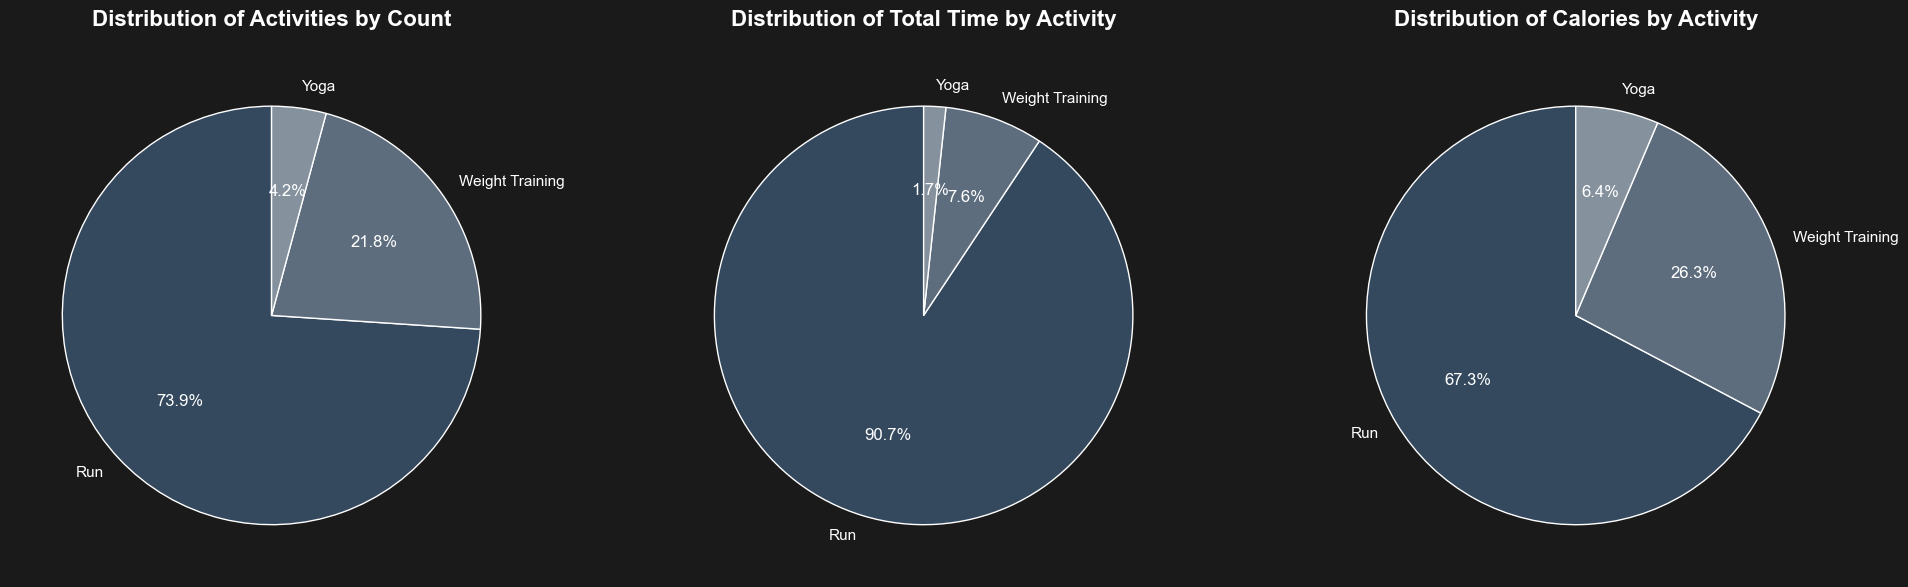

In [40]:
# Set dark theme
plt.style.use('dark_background')

# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), facecolor='#1a1a1a')

# Define distinct dark theme colors
colors = '#34495E', '#5D6D7E', '#85929E'  # Dark slate gray

# Plot 1: Activity Count Distribution
ax1.pie(activity_stats['Count'], 
        labels=activity_stats.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'color': 'white'})
ax1.set_title('Distribution of Activities by Count', 
              color='white',
              fontsize=16,
              fontweight='bold',
              pad=20)

# Plot 2: Total Time Distribution
ax2.pie(activity_stats['Total Time(hours)'], 
        labels=activity_stats.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'color': 'white'})
ax2.set_title('Distribution of Total Time by Activity', 
              color='white',
              fontsize=16,
              fontweight='bold',
              pad=20)

# Plot 3: Total Calories Distribution
ax3.pie(activity_stats['Total Calories'], 
        labels=activity_stats.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'color': 'white'})
ax3.set_title('Distribution of Calories by Activity', 
              color='white',
              fontsize=16,
              fontweight='bold',
              pad=20)

plt.tight_layout()
plt.show()

In [41]:
# Grouping by Activity Type and calculating the mean, min, and max for Distance, and mean for Calories
category_stats = my_strava_data.groupby('Activity Type').agg({
    'Distance': ['mean', 'min', 'max'],  # Mean, min, and max distance for each activity type
    'Calories': 'mean'  # Mean calories burned for each activity type
})

# Resetting the index to make 'Activity Type' a regular column
category_stats = category_stats.reset_index()

# Displaying the results as a DataFrame
from IPython.display import display
display(category_stats)

Activity Type  Distance                Calories
                        mean   min   max        mean
0              Run  9.786136  0.56  42.2  824.956522
1  Weight Training       NaN   NaN   NaN  297.040000
2             Yoga       NaN   NaN   NaN  361.000000

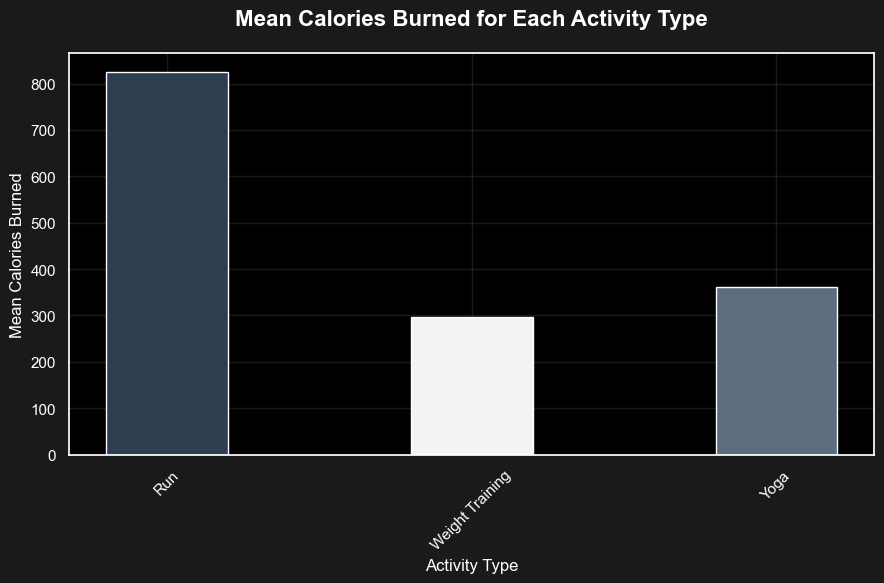

In [42]:
# Set dark theme
plt.style.use('dark_background')

# Define colors for dark theme
colors = ['#2C3E50', '#F2F3F4', '#5D6D7E']

# Extract mean calories from category_stats
mean_calories = category_stats[('Calories', 'mean')]

# Plotting mean calories
plt.figure(figsize=(9, 6), facecolor='#1a1a1a')
plt.bar(category_stats[('Activity Type', '')], 
        mean_calories,
        color=colors, 
        width=0.4)

# Style labels and title with larger fonts
plt.xlabel('Activity Type', color='white', fontsize=12)
plt.ylabel('Mean Calories Burned', color='white', fontsize=12)
plt.title('Mean Calories Burned for Each Activity Type', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Add grid
plt.grid(True, alpha=0.2, color='grey')

plt.tight_layout()
plt.show()

In [43]:
# Filter the DataFrame for 'Run' activities and ignore 0.0 values in 'Min_Per_KM'
filtered_runs = my_strava_data[(my_strava_data['Activity Type'] == 'Run') & (my_strava_data['Min_Per_KM'] != 0.0)]

# Sort the DataFrame by 'Min_Per_KM' in ascending order to get the fastest runs
top_10_fastest_runs = filtered_runs.sort_values(by='Min_Per_KM').head(10)

# Select relevant columns to display
top_10_fastest_runs = top_10_fastest_runs[['Activity Date', 'Activity Name', 'Distance', 'Min_Per_KM', 'Max Heart Rate']]

# Add the Elapsed Time column to the top_10_fastest_runs DataFrame
top_10_fastest_runs = top_10_fastest_runs.merge(my_strava_data[['Activity Date', 'Elapsed Time']], 
                                              on='Activity Date', 
                                              how='left')

# Convert Elapsed Time from seconds to minutes for better readability
top_10_fastest_runs['Elapsed Time'] = top_10_fastest_runs['Elapsed Time'] / 60

# Display the DataFrame
display(top_10_fastest_runs)

,Activity Date,Activity Name,Distance,Min_Per_KM,Max Heart Rate,Elapsed Time
0,2024-05-23 06:00:35,Afternoon Run,5.02,4:15,185.0,21.416667
1,2024-12-24 13:42:39,Afternoon Run,10.01,4:21,190.0,43.733333
2,2024-08-24 15:53:12,Evening Run,6.63,4:21,186.0,29.266667
3,2024-11-03 14:38:11,Afternoon Run,8.01,4:23,193.0,35.450000
4,2024-06-25 15:20:43,Evening Run,1.05,4:23,192.0,4.733333
5,2024-05-19 05:30:49,Afternoon Run,5.02,4:24,188.0,22.183333
6,2024-10-18 04:53:33,Morning Run,5.01,4:25,187.0,24.550000
7,2024-06-02 06:41:22,Afternoon Run,5.41,4:27,194.0,24.550000
8,2024-07-06 16:02:35,Evening Run,3.47,4:28,189.0,23.550000
9,2024-07-14 16:30:07,Evening Run,3.37,4:29,186.0,15.150000


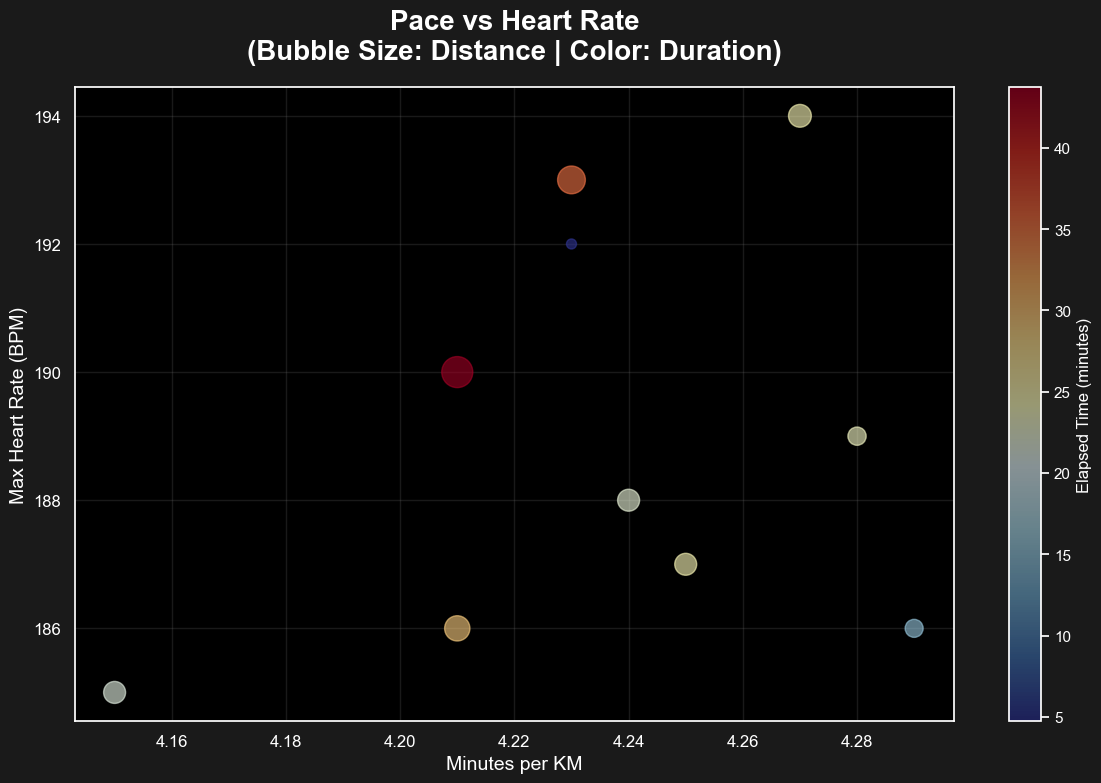

In [44]:
# Set dark theme
plt.style.use('dark_background')

# Create figure
plt.figure(figsize=(12, 8), facecolor='#1a1a1a')

# Convert Min_Per_KM to numeric
pace_numeric = pd.to_numeric(top_10_fastest_runs['Min_Per_KM'].str.replace(':', '.'), errors='coerce')

# Create scatter plot
scatter = plt.scatter(pace_numeric,
                     top_10_fastest_runs['Max Heart Rate'],
                     s=top_10_fastest_runs['Distance']*50,  # Scale bubble size
                     c=top_10_fastest_runs['Elapsed Time'],  # Color by elapsed time
                     cmap='RdYlBu_r',
                     alpha=0.6)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Elapsed Time (minutes)', color='white', fontsize=12)
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Style plot
plt.title('Pace vs Heart Rate\n(Bubble Size: Distance | Color: Duration)', 
          color='white',
          fontsize=20,
          fontweight='bold',
          pad=20)
plt.xlabel('Minutes per KM', color='white', fontsize=14)
plt.ylabel('Max Heart Rate (BPM)', color='white', fontsize=14)
plt.grid(True, alpha=0.2, color='grey')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)

plt.tight_layout()
plt.show()

In [45]:
# Convert Min_Per_KM from 'M:SS' format to numeric minutes
my_strava_data['Min_Per_KM_Numeric'] = pd.to_numeric(my_strava_data['Min_Per_KM'].str.replace(':', '.'), errors='coerce')

# Calculating correlation between elevation gain and pace
correlation = my_strava_data[['Elevation Gain', 'Min_Per_KM_Numeric']].corr()

# Converting the results to a DataFrame
correlation_df = pd.DataFrame(correlation)

from IPython.display import display
display(correlation_df)

,Elevation Gain,Min_Per_KM_Numeric
Elevation Gain,1.000000,-0.097503
Min_Per_KM_Numeric,-0.097503,1.000000


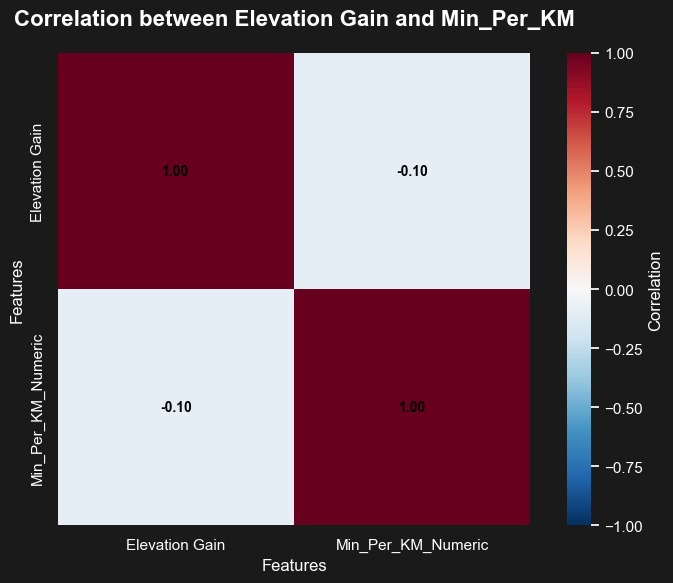

In [46]:
# Set style for dark theme
plt.style.use('dark_background')
sb.set_theme(style="darkgrid")

# Converting results to DataFrame
correlation_df = pd.DataFrame(correlation)

# Create figure with dark background
plt.figure(figsize=(8, 6), facecolor='#1a1a1a')
ax = plt.gca()
ax.set_facecolor('#1a1a1a')

# Plot heatmap
sb.heatmap(correlation_df, 
           annot=True, 
           fmt='.2f',
           cmap='RdBu_r',
           vmin=-1, 
           vmax=1,
           annot_kws={'color': 'black', 'size': 10, 'weight': 'bold'},
           cbar_kws={'label': 'Correlation'},
           square=True)

# Style labels and title
plt.title('Correlation between Elevation Gain and Min_Per_KM', 
          color='white',
          fontsize=16,
          fontweight='bold',
          pad=20)
plt.xlabel('Features', color='white', fontsize=12)
plt.ylabel('Features', color='white', fontsize=12)

# Update tick labels color
plt.xticks(color='white')
plt.yticks(color='white')

# Update colorbar label color
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_color('white')
cbar.ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

In [47]:
# Extracting the day of the week from the Activity Date
my_strava_data['Day of the Week'] = my_strava_data['Activity Date'].dt.day_name()

# Ensure 'Min_Per_KM' is a string before replacing
my_strava_data['Min_Per_KM'] = my_strava_data['Min_Per_KM'].astype(str)

# Convert 'Min_Per_KM' to numeric, coercing errors to NaN
my_strava_data['Min_Per_KM'] = pd.to_numeric(my_strava_data['Min_Per_KM'].str.replace(':', '.'), errors='coerce')

# Grouping by Day of the Week and calculating the average distance, calories burned, and average speed
day_of_week_stats = my_strava_data.groupby('Day of the Week').agg({
    'Distance': 'mean',  # Average distance for each day
    'Calories': 'mean',  # Average calories burned for each day
    'Min_Per_KM': 'mean',  # Min_Per_KM for each day
})

# Resetting the index to make 'Day of the Week' a regular column
day_of_week_stats = day_of_week_stats.reset_index()

from IPython.display import display
display(day_of_week_stats)

,Day of the Week,Distance,Calories,Min_Per_KM
0,Friday,16.067857,1400.000000,4.376000
1,Monday,7.514286,293.000000,3.002727
2,Saturday,8.834000,NaN,4.524000
3,Sunday,7.051111,411.090909,3.435200
4,Thursday,10.512308,631.181818,3.272632
5,Tuesday,9.030455,515.294118,3.488667
6,Wednesday,8.578889,372.571429,2.895000


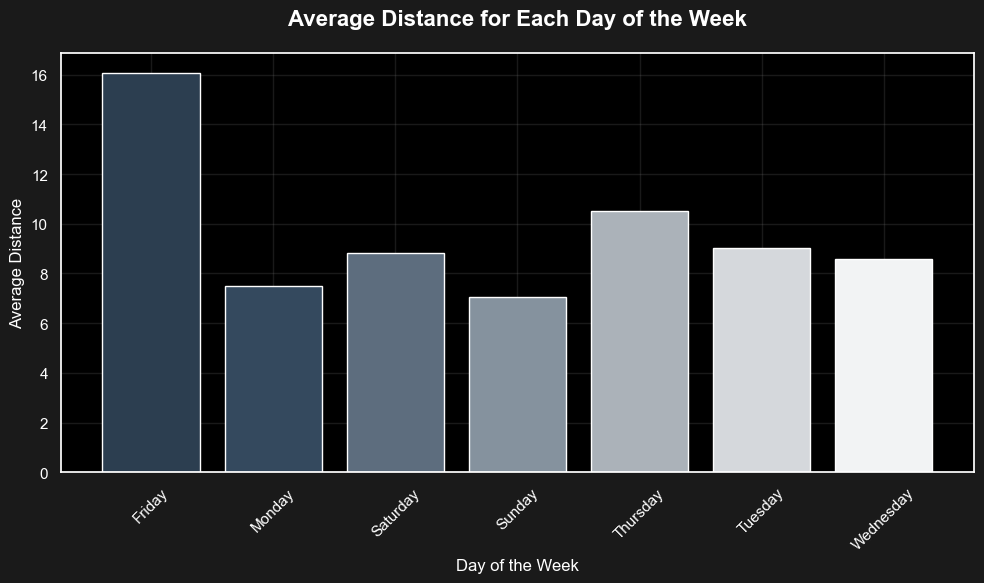

In [48]:
# Bar plot for average distance
plt.style.use('dark_background')
plt.figure(figsize=(10, 6), facecolor='#1a1a1a')

# Dark blue/grey/white color palette
colors = ['#2C3E50', '#34495E', '#5D6D7E', '#85929E', '#ABB2B9', '#D5D8DC', '#F2F3F4']

plt.bar(day_of_week_stats['Day of the Week'], 
        day_of_week_stats['Distance'], 
        color=colors)

# Style labels and title with larger fonts
plt.xlabel('Day of the Week', color='white', fontsize=12)
plt.ylabel('Average Distance', color='white', fontsize=12)
plt.title('Average Distance for Each Day of the Week', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Add grid with light grey color
plt.grid(True, alpha=0.2, color='grey')

plt.tight_layout()
plt.show()

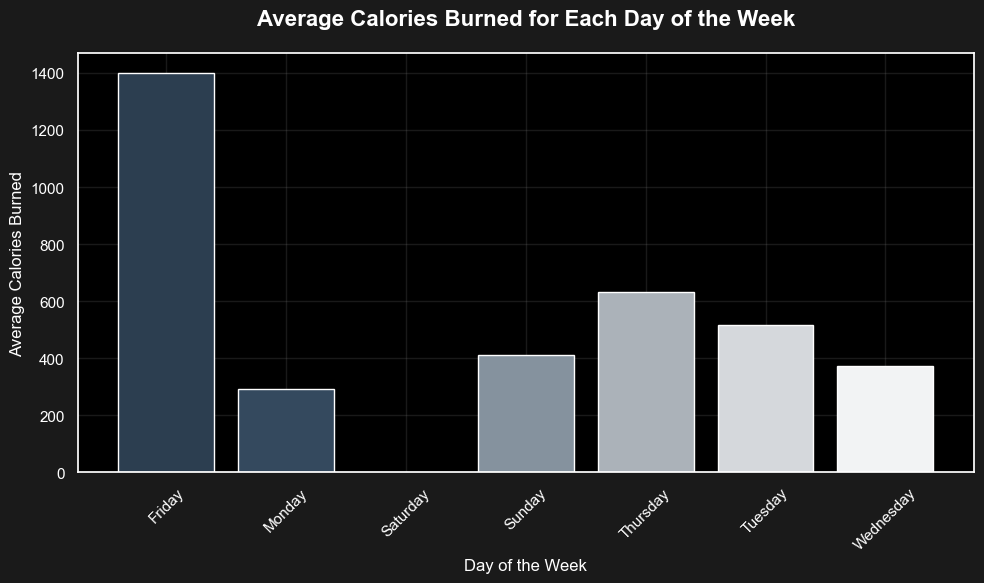

In [49]:
# Set dark theme
plt.style.use('dark_background')

# Define colors for dark theme
colors = ['#2C3E50', '#34495E', '#5D6D7E', '#85929E', '#ABB2B9', '#D5D8DC', '#F2F3F4']

# Bar plot for average calories burned
plt.figure(figsize=(10, 6), facecolor='#1a1a1a')
plt.bar(day_of_week_stats['Day of the Week'], 
        day_of_week_stats['Calories'], 
        color=colors)

# Style labels and title with larger fonts
plt.xlabel('Day of the Week', color='white', fontsize=12)
plt.ylabel('Average Calories Burned', color='white', fontsize=12)
plt.title('Average Calories Burned for Each Day of the Week', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Add grid
plt.grid(True, alpha=0.2, color='grey')

plt.tight_layout()
plt.show()

C:\Users\idobe\AppData\Local\Temp\ipykernel_10812\1430222395.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Day of the Week',
C:\Users\idobe\AppData\Local\Temp\ipykernel_10812\1430222395.py:11: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sb.boxplot(x='Day of the Week',


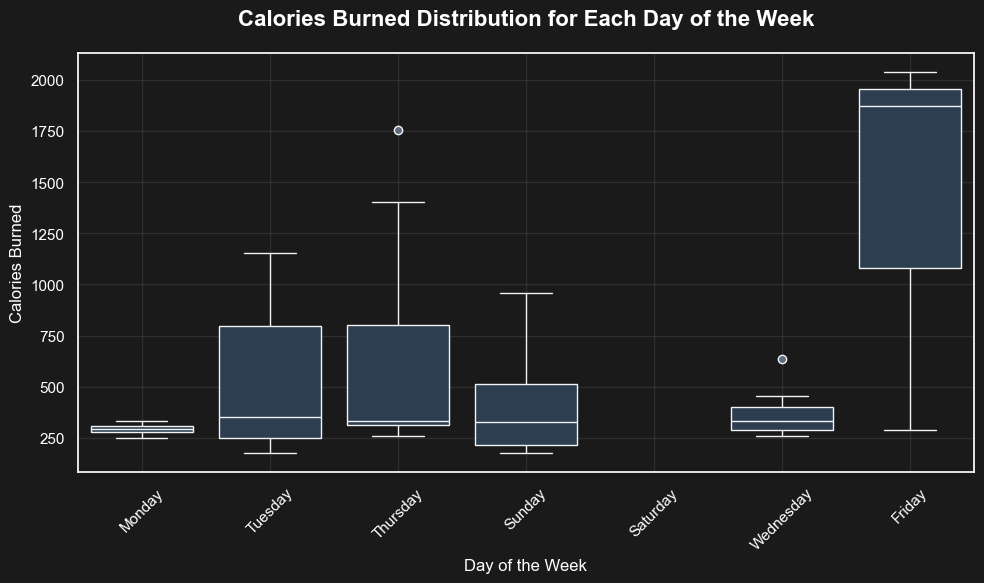

In [50]:
# Set dark theme
plt.style.use('dark_background')
sb.set_style("darkgrid", {"axes.facecolor": ".2"})

# Box plot for calories burned
plt.figure(figsize=(10, 6), facecolor='#1a1a1a')
ax = plt.gca()
ax.set_facecolor('#1a1a1a')

# Create boxplot with dark theme colors
sb.boxplot(x='Day of the Week', 
           y='Calories', 
           data=my_strava_data,
           palette=['#2C3E50'],
           boxprops={'facecolor': '#2C3E50', 'edgecolor': '#F2F3F4'},
           whiskerprops={'color': '#F2F3F4'},
           capprops={'color': '#F2F3F4'},
           flierprops={'markerfacecolor': '#5D6D7E', 'markeredgecolor': '#F2F3F4'},
           medianprops={'color': '#F2F3F4'})

# Style labels and title with larger fonts
plt.xlabel('Day of the Week', color='white', fontsize=12)
plt.ylabel('Calories Burned', color='white', fontsize=12)
plt.title('Calories Burned Distribution for Each Day of the Week', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Adjust grid
plt.grid(True, alpha=0.2, color='grey')

plt.tight_layout()
plt.show()

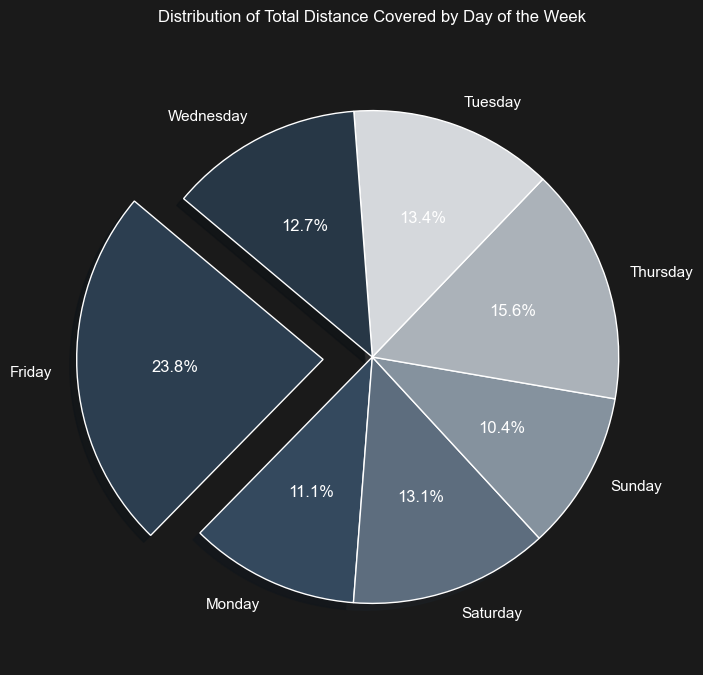

In [51]:
# Set dark theme
plt.style.use('dark_background')

# Define colors for dark theme
colors = ['#2C3E50', '#34495E', '#5D6D7E', '#85929E', '#ABB2B9', '#D5D8DC', '#273746']

# Create pie chart
plt.figure(figsize=(8, 8), facecolor='#1a1a1a')
plt.pie(day_of_week_stats['Distance'], 
        labels=day_of_week_stats['Day of the Week'],
        colors=colors,
        explode=(0.2,0,0,0,0,0,0),
        autopct='%1.1f%%',
        startangle=140,
        shadow=True,
        textprops={'color': 'white'})

plt.title('Distribution of Total Distance Covered by Day of the Week', 
          color='white', 
          pad=20)

plt.show()

In [52]:
# Grouping by Activity Type and calculating the minimum, average, and maximum heart rate for each activity
heart_rate_stats = my_strava_data.groupby('Activity Type')['Max Heart Rate'].agg(['min', 'mean', 'max'])

# Renaming the columns for clarity
heart_rate_stats.columns = ['Min Heart Rate', 'Avg Heart Rate', 'Max Heart Rate']

# Resetting the index to bring 'Activity Type' back as a regular column
heart_rate_stats = heart_rate_stats.reset_index()

# Display the DataFrame
from IPython.display import display
display(heart_rate_stats)

,Activity Type,Min Heart Rate,Avg Heart Rate,Max Heart Rate
0,Run,155.0,185.988636,195.0
1,Weight Training,125.0,139.200000,151.0
2,Yoga,120.0,128.200000,148.0


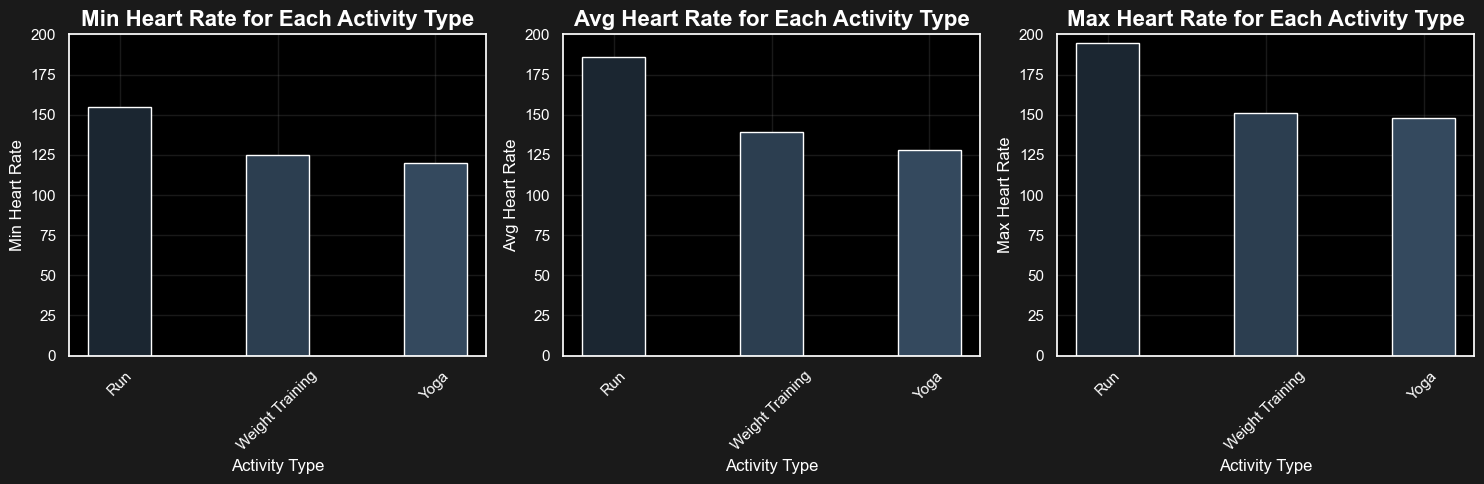

In [53]:
# Set dark theme
plt.style.use('dark_background')

# Define darker colors
colors = ['#1B2631', '#2C3E50', '#34495E']

# Create figure with subplots
plt.figure(figsize=(15, 5), facecolor='#1a1a1a')

# Bar plot for minimum heart rate
plt.subplot(1, 3, 1)
plt.bar(heart_rate_stats['Activity Type'], heart_rate_stats['Min Heart Rate'], width=0.4, color=colors)
plt.xlabel('Activity Type', color='white', fontsize=12)
plt.ylabel('Min Heart Rate', color='white', fontsize=12)
plt.title('Min Heart Rate for Each Activity Type', color='white', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.ylim(0, 200)
plt.grid(True, alpha=0.2, color='grey')

# Bar plot for average heart rate
plt.subplot(1, 3, 2)
plt.bar(heart_rate_stats['Activity Type'], heart_rate_stats['Avg Heart Rate'], width=0.4, color=colors)
plt.xlabel('Activity Type', color='white', fontsize=12)
plt.ylabel('Avg Heart Rate', color='white', fontsize=12)
plt.title('Avg Heart Rate for Each Activity Type', color='white', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.ylim(0, 200)
plt.grid(True, alpha=0.2, color='grey')

# Bar plot for maximum heart rate
plt.subplot(1, 3, 3)
plt.bar(heart_rate_stats['Activity Type'], heart_rate_stats['Max Heart Rate'], width=0.4, color=colors)
plt.xlabel('Activity Type', color='white', fontsize=12)
plt.ylabel('Max Heart Rate', color='white', fontsize=12)
plt.title('Max Heart Rate for Each Activity Type', color='white', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.ylim(0, 200)
plt.grid(True, alpha=0.2, color='grey')

plt.tight_layout()
plt.show()

In [54]:
# Extract the month from the 'Activity Date' column and create a new 'Month' column
my_strava_data['Month'] = my_strava_data['Activity Date'].dt.to_period('M')

# Group the data by 'Month' and calculate the sum of 'Distance' and 'Calories' for each month
monthly_stats = my_strava_data.groupby('Month').agg({
    'Distance': 'sum',  # Sum of distances for each month
    'Calories': 'sum'   # Sum of calories burned for each month
})

# Display the monthly statistics DataFrame
display(monthly_stats)

,Distance,Calories
Month,,
2024-05,77.85,0.0
2024-06,15.48,0.0
2024-07,45.18,0.0
2024-08,57.24,0.0
2024-09,34.90,0.0
2024-10,53.45,0.0
2024-11,131.99,0.0
2024-12,153.88,5387.0
2025-01,238.90,21531.0


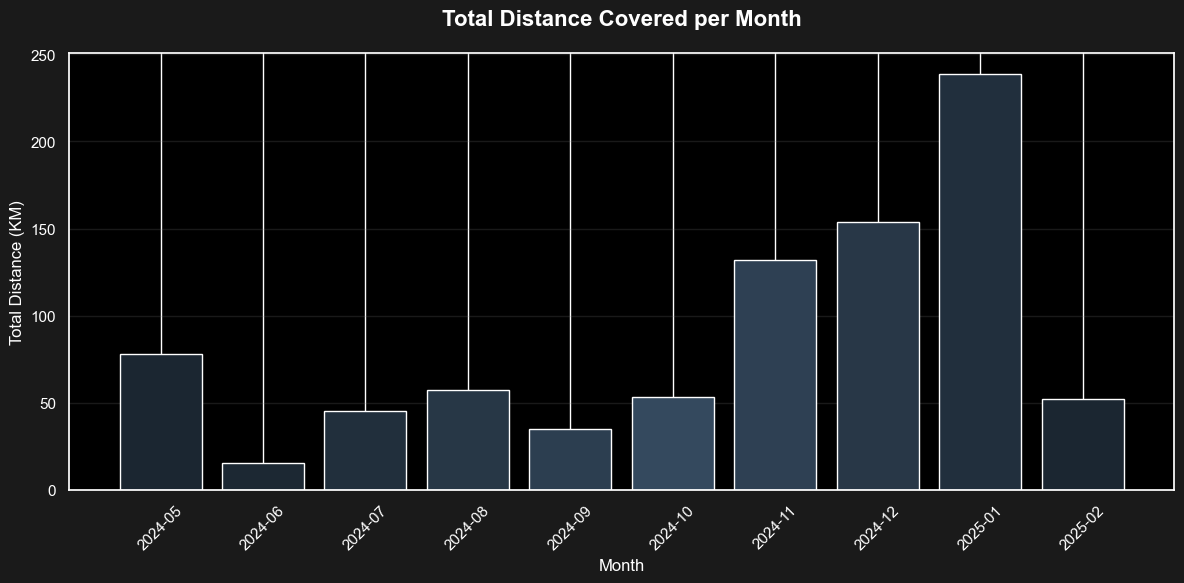

In [55]:
# Set dark theme
plt.style.use('dark_background')

# Define darker colors 
grey_shades = ['#1B2631', '#1C2833', '#212F3C', '#273746', '#2C3E50', '#34495E', 
               '#2E4053', '#283747', '#212F3D', '#1B2631', '#1A2530', '#1C2833']

# Create bar plot
plt.figure(figsize=(12, 6), facecolor='#1a1a1a')
plt.bar(monthly_stats.index.astype(str), 
        monthly_stats['Distance'], 
        color=grey_shades)

# Style labels and title with larger font
plt.title('Total Distance Covered per Month', 
          color='white', 
          pad=20, 
          fontsize=16, 
          fontweight='bold')
plt.xlabel('Month', color='white', fontsize=12)
plt.ylabel('Total Distance (KM)', color='white', fontsize=12)
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

# Add grid
plt.grid(axis='y', alpha=0.2, color='grey')

plt.tight_layout()
plt.show()

In [56]:
# Dropping rows with any null values
my_strava_data_cleaned = my_strava_data.dropna()

# Grouping by Elevation Gain and calculating mean for Average Speed and Calories
elevation_analysis = my_strava_data_cleaned.groupby('Elevation Gain').agg({
    'Max Heart Rate': 'mean',  # Average speed for each elevation
    'Calories': 'mean'        # Average calories for each elevation
})

# Displaying the results
from IPython.display import display
display(elevation_analysis)

,Max Heart Rate,Calories
Elevation Gain,,
17.200001,171.0,175.0
21.400000,170.0,184.0
21.600000,160.0,287.0
30.400000,179.0,202.0
32.400002,169.0,177.0
33.799999,155.0,248.0
44.599998,170.0,446.0
48.400002,175.0,633.0
48.599998,181.0,795.0


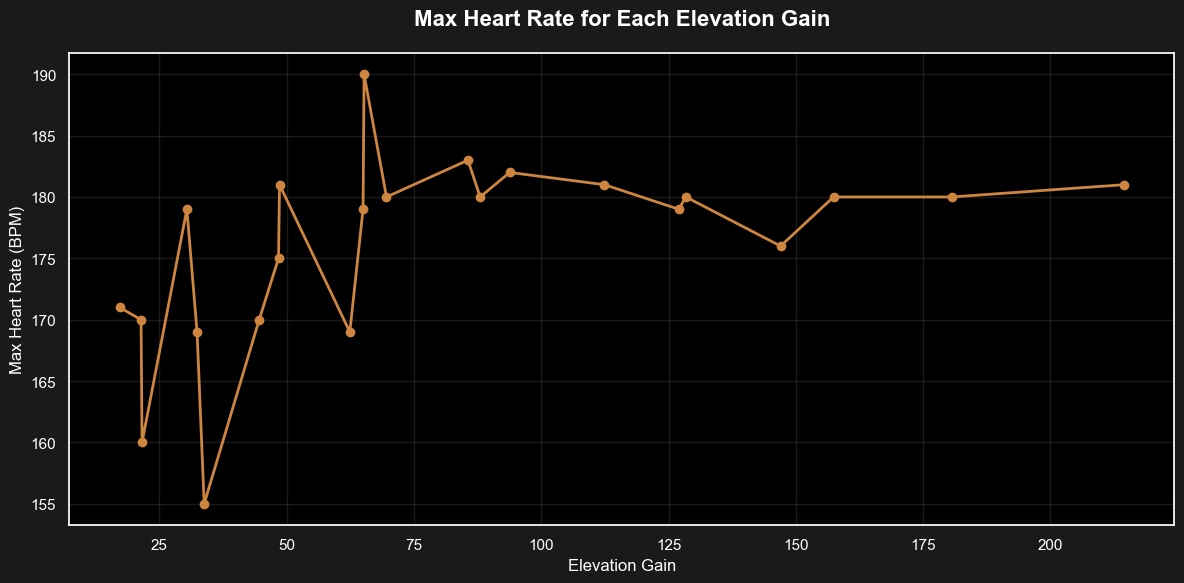

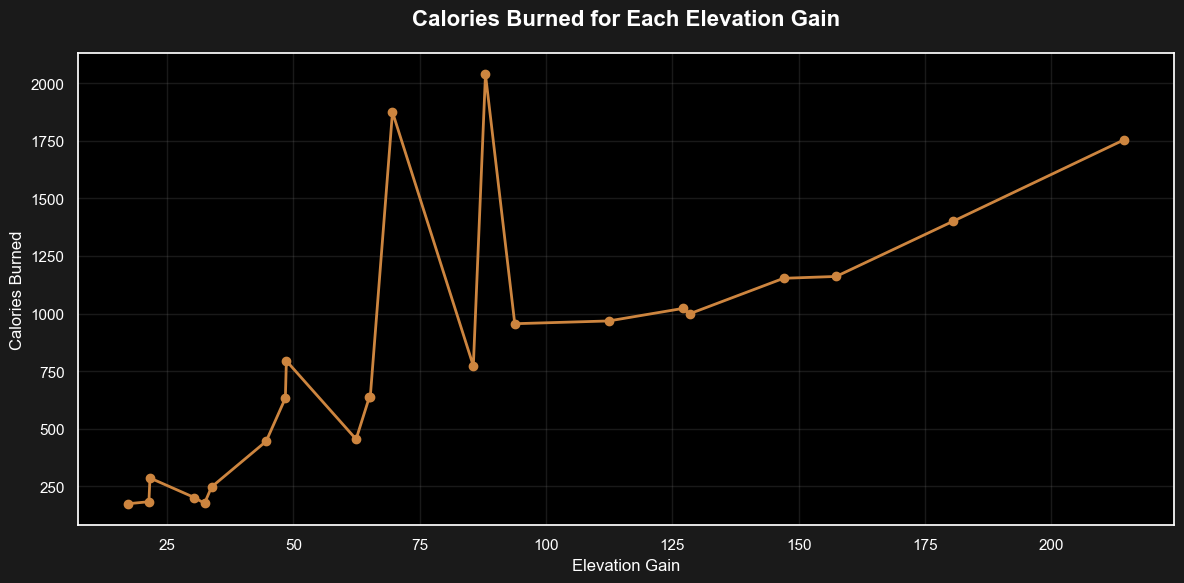

In [57]:
# Dropping rows with any null values
my_strava_data_cleaned = my_strava_data.dropna()

# Grouping by Elevation Gain and calculating mean for Max Heart Rate and Calories
elevation_analysis = my_strava_data_cleaned.groupby('Elevation Gain').agg({
    'Max Heart Rate': 'mean',
    'Calories': 'mean'
})

# Create figure for Max Heart Rate
plt.figure(figsize=(12, 6), facecolor='#1a1a1a')
plt.plot(elevation_analysis.index, 
         elevation_analysis['Max Heart Rate'], 
         marker='o', 
         color='peru',
         linewidth=2)

plt.xlabel('Elevation Gain', color='white', fontsize=12)
plt.ylabel('Max Heart Rate (BPM)', color='white', fontsize=12)
plt.title('Max Heart Rate for Each Elevation Gain', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, alpha=0.2, color='grey')
plt.tight_layout()
plt.show()

# Create figure for Calories
plt.figure(figsize=(12, 6), facecolor='#1a1a1a')
plt.plot(elevation_analysis.index, 
         elevation_analysis['Calories'], 
         marker='o', 
         color='peru',
         linewidth=2)

plt.xlabel('Elevation Gain', color='white', fontsize=12)
plt.ylabel('Calories Burned', color='white', fontsize=12)
plt.title('Calories Burned for Each Elevation Gain', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, alpha=0.2, color='grey')
plt.tight_layout()
plt.show()

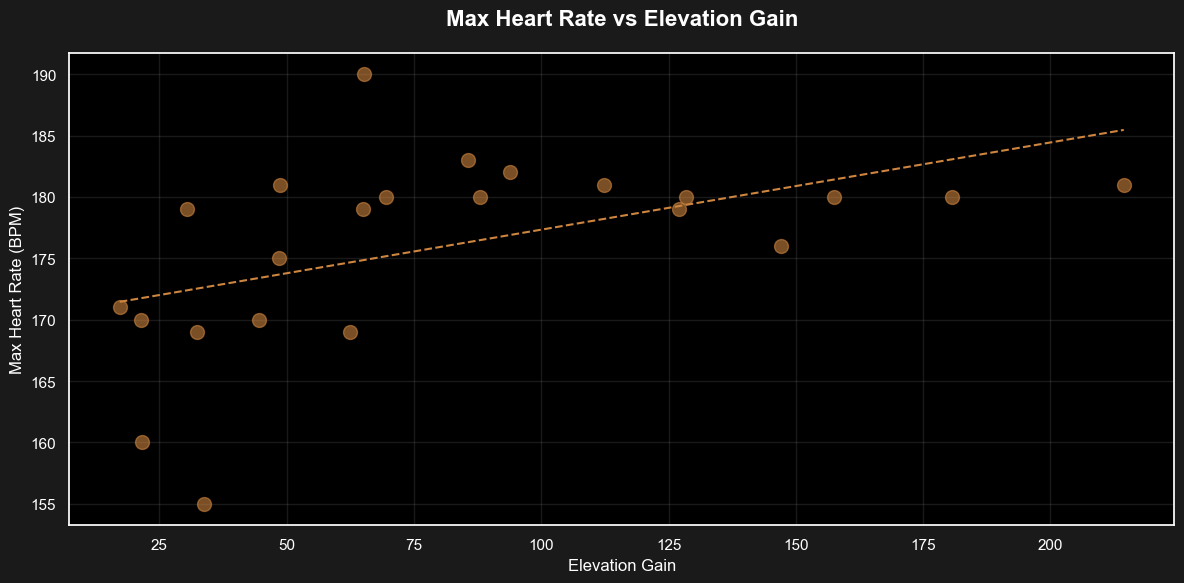

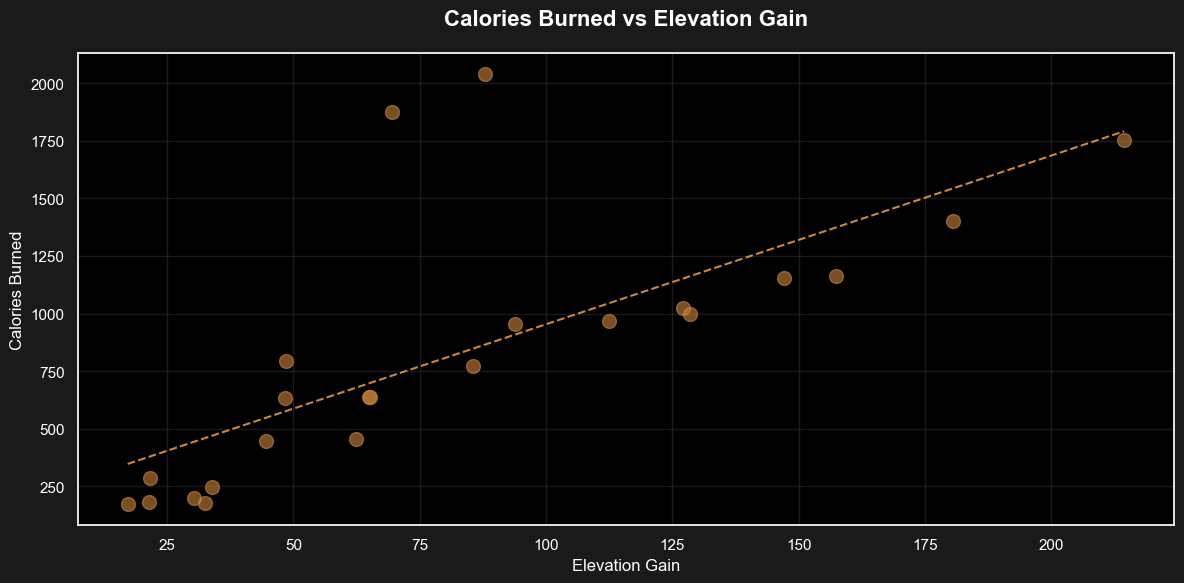

In [58]:
# Dropping rows with any null values
my_strava_data_cleaned = my_strava_data.dropna()

# Grouping by Elevation Gain and calculating mean
elevation_analysis = my_strava_data_cleaned.groupby('Elevation Gain').agg({
    'Max Heart Rate': 'mean',
    'Calories': 'mean'
})

# Create scatter plot for Max Heart Rate
plt.figure(figsize=(12, 6), facecolor='#1a1a1a')
plt.scatter(elevation_analysis.index, 
           elevation_analysis['Max Heart Rate'],
           color='peru',
           alpha=0.6,
           s=100)

# Add trend line
z = np.polyfit(elevation_analysis.index, elevation_analysis['Max Heart Rate'], 1)
p = np.poly1d(z)
plt.plot(elevation_analysis.index, p(elevation_analysis.index), 
         color='peru', 
         linestyle='--')

plt.xlabel('Elevation Gain', color='white', fontsize=12)
plt.ylabel('Max Heart Rate (BPM)', color='white', fontsize=12)
plt.title('Max Heart Rate vs Elevation Gain', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, alpha=0.2, color='grey')
plt.tight_layout()
plt.show()

# Create scatter plot for Calories
plt.figure(figsize=(12, 6), facecolor='#1a1a1a')
plt.scatter(elevation_analysis.index, 
           elevation_analysis['Calories'],
           color='peru',
           alpha=0.6,
           s=100)

# Add trend line
z = np.polyfit(elevation_analysis.index, elevation_analysis['Calories'], 1)
p = np.poly1d(z)
plt.plot(elevation_analysis.index, p(elevation_analysis.index), 
         color='peru', 
         linestyle='--')

plt.xlabel('Elevation Gain', color='white', fontsize=12)
plt.ylabel('Calories Burned', color='white', fontsize=12)
plt.title('Calories Burned vs Elevation Gain', 
          color='white', 
          fontsize=16, 
          fontweight='bold',
          pad=20)
plt.xticks(color='white')
plt.yticks(color='white')
plt.grid(True, alpha=0.2, color='grey')
plt.tight_layout()
plt.show()

In [59]:
# Create ranking DataFrame
def normalize_scores(series, lower_better=True):
    if lower_better:
        return (series.max() - series) / (series.max() - series.min())
    return (series - series.min()) / (series.max() - series.min())

# Create DataFrame with relevant columns
ranking_df = pd.DataFrame({
    'Activity Date': my_strava_data['Activity Date'],
    'Activity Name': my_strava_data['Activity Name'],
    'Min_Per_KM': my_strava_data['Min_Per_KM'],
    'Distance': my_strava_data['Distance'],
    'Max Heart Rate': my_strava_data['Max Heart Rate']
})

# Ensure 'Min_Per_KM' is a string before replacing
ranking_df['Min_Per_KM'] = ranking_df['Min_Per_KM'].astype(str)

# Calculate normalized scores
ranking_df['Pace_Score'] = normalize_scores(pd.to_numeric(ranking_df['Min_Per_KM'].str.replace(':', '.').astype(float)), True) * 0.3
ranking_df['Distance_Score'] = normalize_scores(ranking_df['Distance'], False) * 0.3
ranking_df['Heart_Rate_Score'] = normalize_scores(ranking_df['Max Heart Rate'], True) * 0.3

# Calculate total score and rank
ranking_df['Total_Score'] = ranking_df['Pace_Score'] + ranking_df['Distance_Score'] + ranking_df['Heart_Rate_Score']
ranking_df['Rank'] = ranking_df['Total_Score'].rank(ascending=False)

# Sort by rank and format display
final_ranking = ranking_df.sort_values('Rank')[['Activity Date', 'Activity Name', 'Min_Per_KM', 'Distance', 'Max Heart Rate', 'Total_Score', 'Rank']]
final_ranking = final_ranking.round(3)

# Display top activities
display(final_ranking.head(10))

,Activity Date,Activity Name,Min_Per_KM,Distance,Max Heart Rate,Total_Score,Rank
120,2025-02-28 07:20:04,Morning Run,5.21,42.20,167.0,0.490,1.0
116,2025-01-31 11:39:28,Afternoon Run,5.24,33.01,180.0,0.371,2.0
101,2025-01-17 11:42:36,Afternoon Run,5.24,30.01,180.0,0.349,3.0
91,2025-01-09 13:04:18,Afternoon Run,5.25,26.01,181.0,0.316,4.0
71,2024-12-26 13:27:40,Afternoon Run,4.36,18.02,180.0,0.300,5.0
82,2025-01-02 12:58:39,Afternoon Run,5.04,22.03,180.0,0.300,6.0
61,2024-12-13 13:39:32,Afternoon Run,5.09,25.02,189.0,0.284,7.0
104,2025-01-21 13:21:30,Afternoon Run,4.52,16.01,179.0,0.283,8.0
88,2025-01-07 14:13:23,Afternoon Run,5.19,18.03,176.0,0.281,9.0
49,2024-11-13 03:41:51,Morning Run,4.57,21.89,190.0,0.279,10.0


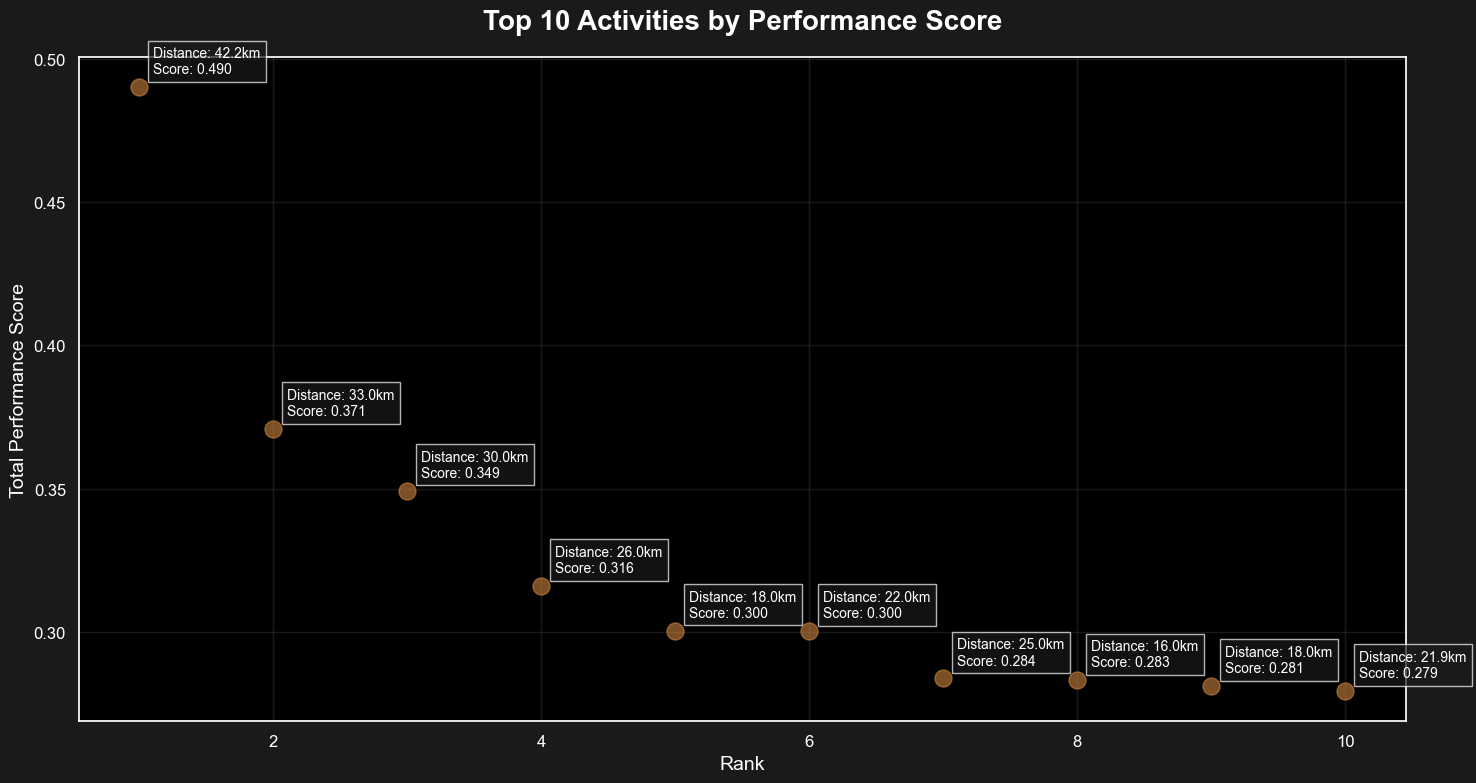

In [60]:
# Set dark theme
plt.style.use('dark_background')

# Get top 10 activities
top_10 = ranking_df.nsmallest(10, 'Rank')

# Create scatter plot
plt.figure(figsize=(15, 8), facecolor='#1a1a1a')

# Plot points
scatter = plt.scatter(top_10['Rank'], 
                     top_10['Total_Score'],
                     c='peru',
                     alpha=0.6,
                     s=150)  # Increased marker size

# Annotate top 10 activities
for idx, row in top_10.iterrows():
    plt.annotate(f"Distance: {row['Distance']:.1f}km\nScore: {row['Total_Score']:.3f}", 
                (row['Rank'], row['Total_Score']),
                xytext=(10, 10),
                textcoords='offset points',
                color='white',
                fontsize=10,  # Increased font size
                bbox=dict(facecolor='#1a1a1a', edgecolor='white', alpha=0.7))

# Style plot
plt.title('Top 10 Activities by Performance Score', 
          color='white',
          fontsize=20,  # Increased title size
          fontweight='bold',
          pad=20)
plt.xlabel('Rank', color='white', fontsize=14)
plt.ylabel('Total Performance Score', color='white', fontsize=14)
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.grid(True, alpha=0.2, color='grey')

plt.tight_layout()
plt.show()


# **Marathon Training Analysis – Key Conclusions**

Through this project, I gained valuable insights into my marathon preparation by analyzing key metrics such as pace, distance, duration, and heart rate. The data revealed important trends and performance improvements while also highlighting areas needing further attention. Below are the six key conclusions drawn from this analysis:

### **Key Conclusions**

1. **I spent 88 sessions and 294 hours on running, 26 sessions and 26 hours on weight training, and 5 sessions and 6 hours on yoga.**  

2. **My total training time included 120 sessions, amounting to 324 hours.**  

3. **I observed how the total training time influenced both my pace and heart rate score.**  

4. **By comparing my total distance per month with expectations, I discovered that my actual mileage was below my target goals.**  

5. **I tracked how many calories I burned each day through my training activities to achieve my body weight goal.**  

6. **I analyzed how elevation gain impacted my heart rate and noted how long it took for my heart rate to adapt to increased elevation.**  

At the end of the process, I achieved my goal of finishing my first marathon. However, my final pace was below the target pace I had planned.  

For next year, I plan to enhance my training approach by focusing on the areas identified for improvement. Specifically, I aim to increase my monthly mileage to meet my goals and maintain consistent training volume throughout the year. Additionally, I will work on improving my pacing strategy on hilly courses to better manage heart rate during elevation gains. By also tracking factors like sleep, nutrition, and recovery, I hope to optimize my performance and preparation for future marathons.  



# **Comparison of Planned vs. Actual Marathon Training**

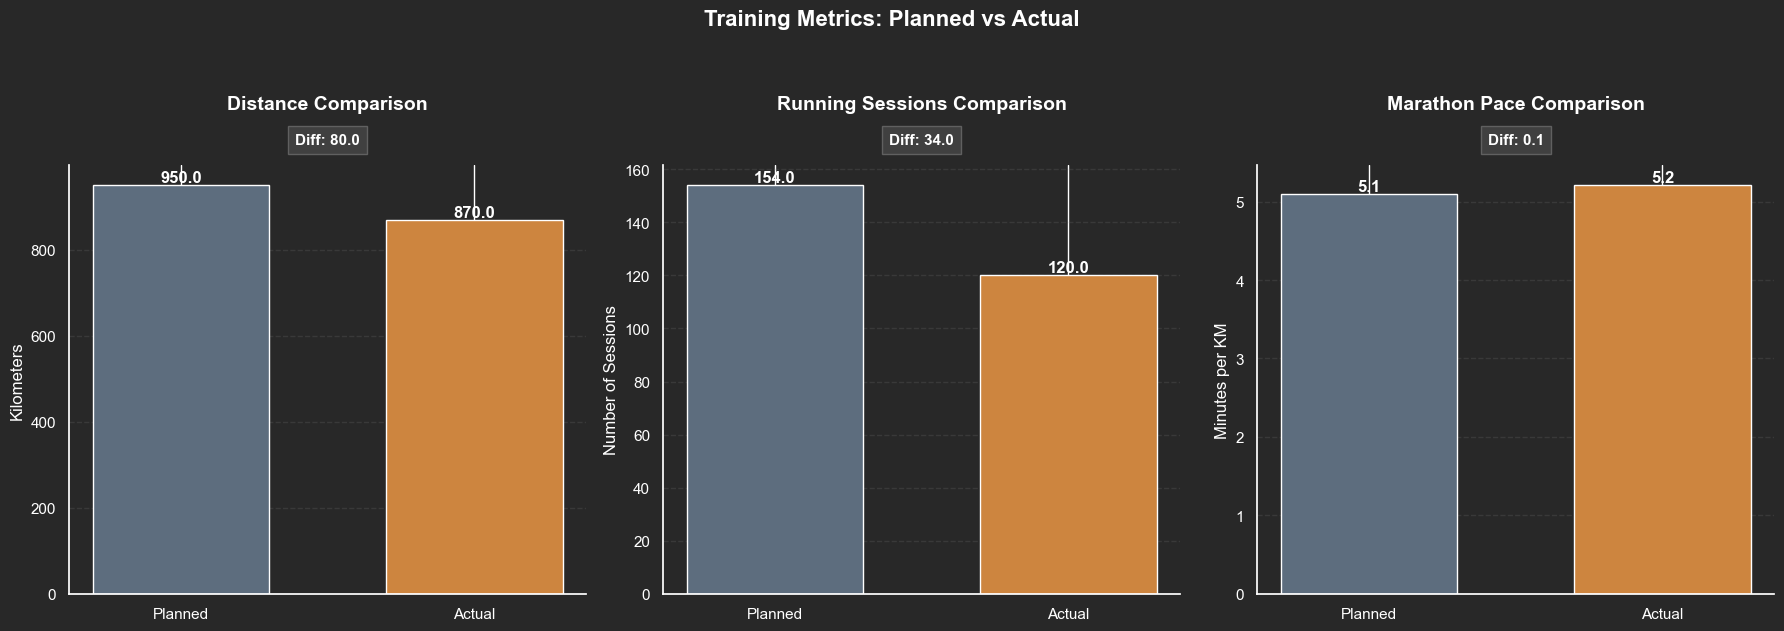

In [61]:
# Data preparation
metrics = ['Distance (km)', 'Running Sessions', 'Marathon Pace (min/km)']
planned = [950, 154, 5.10]  
actual = [870, 120, 5.21]   

# Set dark theme
plt.style.use('dark_background')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), facecolor='#282828')

# Colors for dark theme
planned_color = '#5D6D7E'
actual_color = 'peru'   
text_color = 'white'

# Function to add value labels and difference
def add_labels(ax, planned_val, actual_val):
    diff = planned_val - actual_val
    for i, v in enumerate([planned_val, actual_val]):
        ax.text(i, v, f'{v:.1f}', ha='center', va='bottom', 
                color=text_color, fontsize=12, fontweight='bold')
    # Add difference label
    ax.text(0.5, max(planned_val, actual_val) * 1.1, 
            f'Diff: {abs(diff):.1f}', 
            ha='center', color=text_color,
            bbox=dict(facecolor='#404040', edgecolor='#606060', pad=5),
            fontsize=11, fontweight='bold')

# Plot 1: Distance
bars1 = ax1.bar(['Planned', 'Actual'], [planned[0], actual[0]], 
                color=[planned_color, actual_color], width=0.6)
ax1.set_title('Distance Comparison', pad=40, fontsize=14, fontweight='bold', color=text_color)
ax1.set_ylabel('Kilometers', fontsize=12, color=text_color)
add_labels(ax1, planned[0], actual[0])

# Plot 2: Running Sessions
bars2 = ax2.bar(['Planned', 'Actual'], [planned[1], actual[1]], 
                color=[planned_color, actual_color], width=0.6)
ax2.set_title('Running Sessions Comparison', pad=40, fontsize=14, fontweight='bold', color=text_color)
ax2.set_ylabel('Number of Sessions', fontsize=12, color=text_color)
add_labels(ax2, planned[1], actual[1])

# Plot 3: Marathon Pace
bars3 = ax3.bar(['Planned', 'Actual'], [planned[2], actual[2]], 
                color=[planned_color, actual_color], width=0.6)
ax3.set_title('Marathon Pace Comparison', pad=40, fontsize=14, fontweight='bold', color=text_color)
ax3.set_ylabel('Minutes per KM', fontsize=12, color=text_color)
add_labels(ax3, planned[2], actual[2])

# Enhance grid and styling for all plots
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('#282828')
    ax.grid(True, axis='y', linestyle='--', alpha=0.2, color='gray')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(colors=text_color)
    
# Add a main title
plt.suptitle('Training Metrics: Planned vs Actual', 
             fontsize=16, fontweight='bold', y=1.05, color=text_color)

# Adjust layout
plt.tight_layout()
plt.show()